In [1]:
!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

     |████████████████████████████████| 720 kB 5.2 MB/s 
     |████████████████████████████████| 188 kB 39.7 MB/s 
     |████████████████████████████████| 1.2 MB 37.1 MB/s 
     |████████████████████████████████| 60 kB 6.6 MB/s 
Mounted at /content/gdrive


In [2]:
from fastai.vision.all import *
from fastbook import *

matplotlib.rc('image', cmap='Greys')

In [3]:
URLs.MNIST_SAMPLE

'https://s3.amazonaws.com/fast-ai-sample/mnist_sample.tgz'

In [4]:
doc(untar_data)

untar_data(url, archive=None, data=None, c_key='data', force_download=False)
Download `url` to `fname` if `dest` doesn't exist, and extract to folder `dest`

To get a prettier result with hyperlinks to source code and documentation, install nbdev: pip install nbdev


In [5]:
path = untar_data(URLs.MNIST_SAMPLE)

In [6]:
threes = (path/'train/3').ls().sorted()
sevens = (path/'train/7').ls().sorted()
threes

(#6131) [Path('/root/.fastai/data/mnist_sample/train/3/10.png'),Path('/root/.fastai/data/mnist_sample/train/3/10000.png'),Path('/root/.fastai/data/mnist_sample/train/3/10011.png'),Path('/root/.fastai/data/mnist_sample/train/3/10031.png'),Path('/root/.fastai/data/mnist_sample/train/3/10034.png'),Path('/root/.fastai/data/mnist_sample/train/3/10042.png'),Path('/root/.fastai/data/mnist_sample/train/3/10052.png'),Path('/root/.fastai/data/mnist_sample/train/3/1007.png'),Path('/root/.fastai/data/mnist_sample/train/3/10074.png'),Path('/root/.fastai/data/mnist_sample/train/3/10091.png')...]

In [7]:
im3_path = threes[7]
im3 = Image.open(im3_path)
im3

In [8]:
array(im3)[4:15, 4:22]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   1,   5,  49, 106, 171, 247, 255, 157,   1],
       [  0,   0,   0,   0,   0,   0,   0,   7,  76, 173, 254, 254, 254, 254, 254, 254, 254,  12],
       [  0,   0,   0,   0,   0,  18, 133, 238, 254, 254, 254, 254, 254, 254, 254, 254, 223,   8],
       [  0,   0,   0,   0,   0, 192, 254, 254, 254, 240, 194, 153, 114, 244, 254, 249,  38,   0],
       [  0,   0,   0,   0,   0, 176, 233, 194,  83,  12,   0, 106, 245, 254, 249,  62,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   5, 137, 245, 254, 220,  55,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   4,  97, 191, 254, 254, 220,  35,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,  36, 190, 254, 254, 254, 254, 207,  36,   0,   0,   0,   0],
       [  

In [9]:
im3_t = tensor(im3)
df = pd.DataFrame(im3_t[4:15, 4:22])
df.style.set_properties(**{'font-size':'6pt'}).background_gradient('Greys')

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,1,5,49,106,171,247,255,157,1
3,0,0,0,0,0,0,0,7,76,173,254,254,254,254,254,254,254,12
4,0,0,0,0,0,18,133,238,254,254,254,254,254,254,254,254,223,8
5,0,0,0,0,0,192,254,254,254,240,194,153,114,244,254,249,38,0
6,0,0,0,0,0,176,233,194,83,12,0,106,245,254,249,62,0,0
7,0,0,0,0,0,0,0,0,0,5,137,245,254,220,55,0,0,0
8,0,0,0,0,0,0,0,4,97,191,254,254,220,35,0,0,0,0
9,0,0,0,0,0,0,36,190,254,254,254,254,207,36,0,0,0,0


In [10]:
three_tensors = [tensor(Image.open(three)) for three in threes]
seven_tensors = [tensor(Image.open(seven)) for seven in sevens]
len(three_tensors), len(seven_tensors)

(6131, 6265)

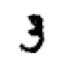

In [11]:
show_image(three_tensors[0])

In [12]:
stacked_threes = torch.stack(three_tensors).float()/255
stacked_sevens = torch.stack(seven_tensors).float()/255
stacked_threes.shape

torch.Size([6131, 28, 28])

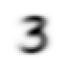

In [13]:
mean3 = stacked_threes.mean(0)
show_image(mean3)

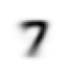

In [14]:
mean7 = stacked_sevens.mean(0)
show_image(mean7)

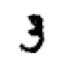

In [15]:
im3 = stacked_threes[0]
show_image(im3)

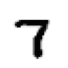

In [16]:
im7 = stacked_sevens[0]
show_image(im7)

In [17]:
dif_3 = (mean3 - im3).abs()
dif_7 = (mean3 - im7).abs()

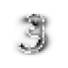

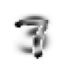

In [18]:
show_image(dif_3)
show_image(dif_7)

In [19]:
dif_3.mean(), dif_7.mean()

(tensor(0.1074), tensor(0.1716))

In [20]:
# the difference of stacked_threes to mean3
stacked_threes_dif = (mean3 - stacked_threes).abs()

In [21]:
stacked_sevens_dif = (mean3 - stacked_sevens).abs()

In [22]:
stacked_threes_dif.shape, stacked_sevens_dif.shape

(torch.Size([6131, 28, 28]), torch.Size([6265, 28, 28]))

In [23]:
stacked_threes_dif.mean(), stacked_sevens_dif.mean()

(tensor(0.1313), tensor(0.1602))

In [24]:
F.l1_loss(im3, mean3), F.l1_loss(im7, mean3)

(tensor(0.1074), tensor(0.1716))

In [25]:
t = tensor([i for i in range(10)])
t

tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [26]:
t = tensor([[1,2,3],[4,5,6],[7,8,9]])


In [27]:
t

tensor([[1, 2, 3],
        [4, 5, 6],
        [7, 8, 9]])

In [28]:
t+tensor([1,2,3])

tensor([[ 2,  4,  6],
        [ 5,  7,  9],
        [ 8, 10, 12]])

In [29]:
valid_3_tens = torch.stack([tensor(Image.open(o)) for o in (path/'valid/3').ls().sorted()]).float()/255
valid_7_tens = torch.stack([tensor(Image.open(o)) for o in (path/'valid/7').ls().sorted()]).float()/255
valid_3_tens.shape, valid_7_tens.shape

(torch.Size([1010, 28, 28]), torch.Size([1028, 28, 28]))

In [30]:
valid_3_tens[0][:4]

tensor([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [31]:
def mnist_distance(a,b): return (a-b).abs().mean((-1,-2))

In [32]:
mnist_distance(mean3, im3)

tensor(0.1074)

In [33]:
mnist_distance(valid_3_tens, mean3).shape

torch.Size([1010])

In [34]:
def is_3(x): return mnist_distance(x, mean3) < mnist_distance(x, mean7)

In [35]:
is_3(valid_3_tens).float().mean(), (1-is_3(valid_7_tens).float()).mean()

(tensor(0.9168), tensor(0.9854))

In [36]:
is_3(valid_7_tens).float().mean()

tensor(0.0146)

In [37]:
def f(x,y):
  return ((x**2 + 3*y**3)**2).sum()

In [38]:
xt = tensor([2.,5.,3.]).requires_grad_()

In [39]:
yt = tensor([3.,8.,12.]).requires_grad_()

In [40]:
ft = f(xt, yt)
ft

tensor(29411194., grad_fn=<SumBackward0>)

In [41]:
ft.backward()

In [42]:
xt.grad

tensor([  680., 31220., 62316.])

In [43]:
yt.grad

tensor([   13770.,  1798272., 13460256.])

In [44]:
time = torch.arange(0,20).float()
time


tensor([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13., 14., 15., 16., 17., 18., 19.])

In [45]:
speed = torch.randn(20)*3 + 0.75*(time-9.5)**2+1

In [46]:
speed

tensor([74.4682, 59.6494, 45.8897, 26.3709, 21.4131, 19.4225, 12.5899, 10.7294,  3.7551, -0.8724, -0.2926,  3.4120,  4.9926, 10.3128, 15.4328, 26.2671, 31.7583, 42.0004, 57.5977, 66.8227])

In [47]:
speed.shape

torch.Size([20])

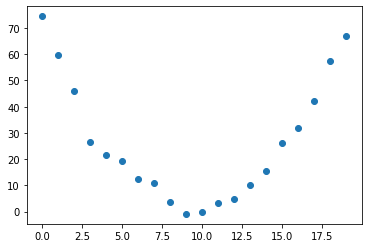

In [48]:
plt.scatter(time, speed)

In [49]:
def f(t, params):
  a,b,c = params
  return a*(t**2) + (b*t) + c

In [50]:
def mse(preds, targets):
  return ((preds-targets)**2).mean()

In [51]:
params = torch.randn(3).requires_grad_()

In [52]:
params

tensor([-0.7658, -0.7506,  1.3525], requires_grad=True)

In [53]:
loss = mse(f(time, params), speed)
loss

tensor(25823.8086, grad_fn=<MeanBackward0>)

In [54]:
loss.backward()

In [55]:
g = params.grad

In [56]:
learning_rate = 0.01

In [57]:
def show_preds(preds, ax=None):
  if ax is None: ax=plt.subplots()[1]
  ax.scatter(time, speed)
  ax.scatter(time, to_np(preds), color='red')
  ax.set_ylim(-300, 100)

In [58]:
preds = f(time, params)

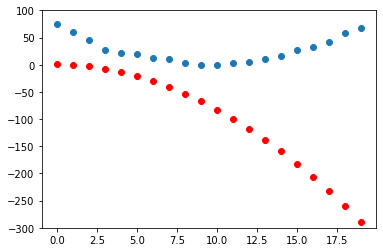

In [59]:
show_preds(preds)

In [60]:
params.data -= learning_rate * params.grad.data
params.grad = None
params


tensor([531.1927,  33.4465,   3.8915], requires_grad=True)

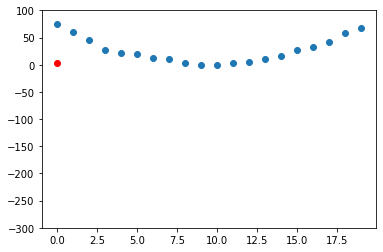

In [61]:
preds = f(time, params)
show_preds(preds)

In [62]:
params = torch.randn(3).requires_grad_()

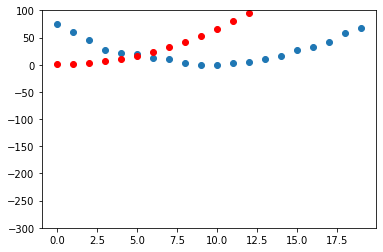

In [63]:
preds = f(time, params)
show_preds(preds)

In [64]:
loss = mse(preds, speed)

In [65]:
loss

tensor(8631.7373, grad_fn=<MeanBackward0>)

In [66]:
loss.backward()

In [67]:
params.grad

tensor([29901.0918,  1916.4382,   111.7121])

In [68]:
learning_rate = 1e-5

In [69]:
params.data -= learning_rate * params.grad.data
params.grad = None
params

tensor([ 0.3873, -0.3469,  0.7939], requires_grad=True)

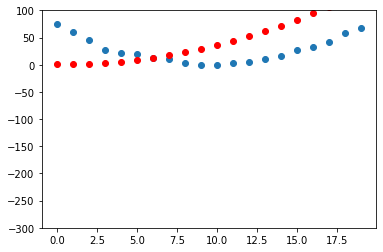

In [70]:
preds = f(time, params)
show_preds(preds)

In [71]:
def apply_step(params, prn=True):
  preds = f(time, params)
  loss = mse(preds, speed)
  loss.backward()
  params.data -= learning_rate * params.grad.data
  params.grad = None
  if prn: print(f'Current Loss: {loss.item()}')
  return preds

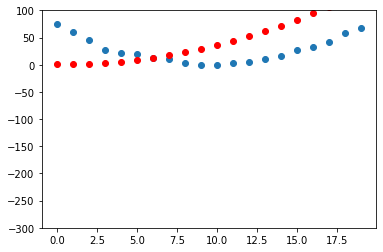

In [72]:
preds = f(time, params)
show_preds(preds)

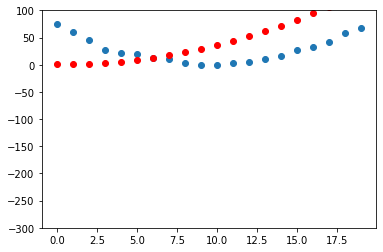

In [73]:
preds = f(time, params)
show_preds(preds)

In [74]:
params

tensor([ 0.3873, -0.3469,  0.7939], requires_grad=True)

In [75]:
params = tensor([0.7308, -13.8719,  67.5689], requires_grad=True)

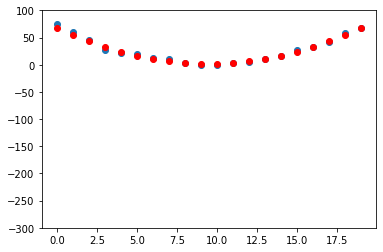

In [76]:
preds = f(time, params)
show_preds(preds)

In [77]:
apply_step(params)

Current Loss: 9.686090469360352


tensor([67.5689, 54.4278, 42.7483, 32.5304, 23.7741, 16.4794, 10.6463,  6.2748,  3.3649,  1.9166,  1.9299,  3.4048,  6.3413, 10.7394, 16.5991, 23.9204, 32.7033, 42.9478, 54.6539, 67.8216],
       grad_fn=<AddBackward0>)

In [78]:
def f(time, params):
  a,b,c = params;
  return a*(time**2) + (b*time) + c

In [79]:
params = torch.randn(3, requires_grad=True)
params

tensor([0.2815, 0.0562, 0.5227], requires_grad=True)

In [80]:
preds = f(time, params)
preds

tensor([  0.5227,   0.8604,   1.7611,   3.2249,   5.2517,   7.8415,  10.9944,  14.7103,  18.9893,  23.8313,  29.2363,  35.2044,  41.7355,  48.8296,  56.4868,  64.7071,  73.4903,  82.8366,  92.7460,
        103.2184], grad_fn=<AddBackward0>)

In [81]:
loss = mse(preds, speed)
loss.backward()

In [82]:
g = params.grad
g

tensor([8442.9541,  544.7577,   18.4759])

In [83]:
print(g)

tensor([8442.9541,  544.7577,   18.4759])


In [84]:
rank2 = torch.randn((2,3))
rank2

tensor([[-0.2384, -0.0499,  0.5263],
        [-0.0085,  0.7291,  0.1331]])

In [85]:
rank3 = torch.stack([rank2 for _ in range(2)])
rank3

tensor([[[-0.2384, -0.0499,  0.5263],
         [-0.0085,  0.7291,  0.1331]],

        [[-0.2384, -0.0499,  0.5263],
         [-0.0085,  0.7291,  0.1331]]])

In [86]:
rank3.view(-1).shape

torch.Size([12])

In [87]:
n = torch.randn((4,4))

In [88]:
n

tensor([[ 0.3466, -0.1973, -1.0546,  1.2780],
        [ 0.1453,  0.2311,  0.0087, -0.1423],
        [ 0.5750, -0.6417, -2.2064, -0.7508],
        [ 2.8140,  0.3598, -0.0898,  0.4584]])

In [89]:
n.view(1,-1)

tensor([[ 0.3466, -0.1973, -1.0546,  1.2780,  0.1453,  0.2311,  0.0087, -0.1423,  0.5750, -0.6417, -2.2064, -0.7508,  2.8140,  0.3598, -0.0898,  0.4584]])

In [90]:
t = torch.randn((3,1010,28,28))
t.view(-1, 28,28).shape

torch.Size([3030, 28, 28])

In [91]:
train_x = torch.cat([stacked_threes, stacked_sevens]).view(-1,28*28)

In [92]:
train_x.shape

torch.Size([12396, 784])

In [93]:
a = [1]*100 + [0]*100


In [94]:
a = tensor(a)
a.shape


torch.Size([200])

In [95]:
a = a.unsqueeze(1)
a.shape

torch.Size([200, 1])

In [96]:
doc(unsqueeze)

unsqueeze(x, dim=-1, n=1)
Same as `torch.unsqueeze` but can add `n` dims

To get a prettier result with hyperlinks to source code and documentation, install nbdev: pip install nbdev


In [97]:
a = torch.randn((2,2))
a.shape

torch.Size([2, 2])

In [98]:
a

tensor([[0.8640, 0.1519],
        [0.2347, 0.5836]])

In [99]:
a = a.unsqueeze(1)
a.shape

torch.Size([2, 1, 2])

In [100]:
a

tensor([[[0.8640, 0.1519]],

        [[0.2347, 0.5836]]])

In [101]:
b = torch.randn((1,2))
b

tensor([[ 0.3361, -0.7933]])

In [102]:
train_y = tensor([1]*len(threes) + [0]*len(sevens)).unsqueeze(1)
train_y.shape

torch.Size([12396, 1])

In [103]:
train_y[0].dtype

torch.int64

In [104]:
dset = list(zip(train_x, train_y))
x,y = dset[0]
x.shape, y

(torch.Size([784]), tensor([1]))

In [105]:
len(dset)

12396

In [106]:
len(dset)

12396

In [107]:
valid_x = torch.cat([valid_3_tens, valid_7_tens]).view(-1, 28*28)
valid_y = tensor([1]*len(valid_3_tens) + [0]*len(valid_7_tens)).unsqueeze(1)
valid_dset = list(zip(valid_x, valid_y))

In [108]:
valid_x[0].dtype

torch.float32

In [109]:
a,b = valid_dset[0]
a.shape, b.shape

(torch.Size([784]), torch.Size([1]))

In [110]:
a.dtype

torch.float32

In [111]:
a = torch.randn((2,2))
b = torch.randn((3,3))
c = [a,b]
c

[tensor([[-0.0241,  0.2986],
         [ 0.8977, -0.0025]]), tensor([[-0.7659,  0.0827, -0.0326],
         [ 0.3038, -1.5578,  0.8991],
         [ 1.4943, -2.4984,  0.4495]])]

In [112]:
x,y = valid_dset[0]
x.shape, y

(torch.Size([784]), tensor([1]))

In [113]:
def init_params(size, std=1.0): return (torch.randn(size)*std).requires_grad_()

In [114]:
weights = init_params((28*28,1))

In [115]:
weights.shape

torch.Size([784, 1])

In [116]:
bias = init_params(1)
bias

tensor([0.5629], requires_grad=True)

In [117]:
weights.T.shape

torch.Size([1, 784])

In [118]:
x.shape

torch.Size([784])

In [119]:
(train_x[0]*weights.T).sum() + bias

tensor([-9.1160], grad_fn=<AddBackward0>)

In [120]:
a = tensor([1,2,3])
b = tensor([[1,2,3], [4,5,6], [7,8,9]])

In [121]:
a

tensor([1, 2, 3])

In [122]:
b

tensor([[1, 2, 3],
        [4, 5, 6],
        [7, 8, 9]])

In [123]:
c = a@b
c

tensor([30, 36, 42])

In [124]:
train_x.shape

torch.Size([12396, 784])

In [125]:
def linear1(xb): return xb@weights + bias

In [126]:
preds = linear1(train_x)
preds.shape

torch.Size([12396, 1])

In [127]:
corrects = (preds>0.0).float() == train_y
corrects

tensor([[False],
        [False],
        [False],
        ...,
        [False],
        [False],
        [False]])

In [128]:
corrects.shape

torch.Size([12396, 1])

In [129]:
corrects.float().mean().item()

0.5044369101524353

In [130]:
def mnist_loss(predictions, targets):
  predictions = predictions.sigmoid()
  return torch.where(targets==1, 1-predictions, predictions).mean()

In [131]:
targets = tensor([1,0,1])
predictions = tensor([0.9, 0.2, 0.6])

In [132]:
loss = mnist_loss(predictions, targets)
loss

tensor(0.3977)

In [133]:
loss

tensor(0.3977)

/usr/local/lib/python3.7/dist-packages/fastbook/__init__.py:72: UserWarning: Not providing a value for linspace's steps is deprecated and will throw a runtime error in a future release. This warning will appear only once per process. (Triggered internally at  ../aten/src/ATen/native/RangeFactories.cpp:23.)
  x = torch.linspace(min,max)


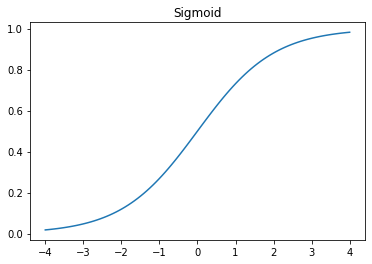

In [134]:
plot_function(torch.sigmoid, title='Sigmoid', min=-4, max=4)

In [135]:
ds = L(enumerate(string.ascii_lowercase))
ds

(#26) [(0, 'a'),(1, 'b'),(2, 'c'),(3, 'd'),(4, 'e'),(5, 'f'),(6, 'g'),(7, 'h'),(8, 'i'),(9, 'j')...]

In [136]:
dl = DataLoader(ds, batch_size=6, shuffle=True)
list(dl)

[(tensor([ 7, 24, 17, 21,  5, 19]), ('h', 'y', 'r', 'v', 'f', 't')),
 (tensor([ 9, 15, 14,  4, 16,  0]), ('j', 'p', 'o', 'e', 'q', 'a')),
 (tensor([22, 13, 25,  3,  2, 11]), ('w', 'n', 'z', 'd', 'c', 'l')),
 (tensor([12, 23,  1, 10,  8, 20]), ('m', 'x', 'b', 'k', 'i', 'u')),
 (tensor([18,  6]), ('s', 'g'))]

In [137]:
weights = init_params((28*28, 1))
bias = init_params(1)

In [138]:
bias

tensor([-0.8222], requires_grad=True)

In [139]:
weights.shape, bias.shape

(torch.Size([784, 1]), torch.Size([1]))

In [140]:
dl = DataLoader(dset, batch_size=256)
xb,yb = first(dl)
xb.shape, yb.shape

(torch.Size([256, 784]), torch.Size([256, 1]))

In [141]:
valid_dl = DataLoader(valid_dset, batch_size=256)

In [142]:
first_batch_x, first_batch_y = first(valid_dl)
first_batch_x.shape, first_batch_y.shape

(torch.Size([256, 784]), torch.Size([256, 1]))

In [143]:
batch = train_x[:4]
batch.shape

torch.Size([4, 784])

In [144]:
preds = linear1(batch)
preds

tensor([[-10.8726],
        [ -2.6977],
        [ -4.5919],
        [  1.1026]], grad_fn=<AddBackward0>)

In [145]:
loss = mnist_loss(preds, train_y[:4])
loss

tensor(0.7940, grad_fn=<MeanBackward0>)

In [146]:
loss.backward()


In [147]:
def calc_grad(xb, yb, model):
  preds = model(xb)
  loss = mnist_loss(preds, yb)
  loss.backward()

In [ ]:
calc_grad(batch, train_y[:4], linear1)
weights.grad, bias.grad

In [ ]:
weights.grad, bias.grad

In [150]:
lr = 1e-5

In [151]:
weights.data -= weights.grad.data
bias.data -= bias.grad.data
# reset gradients 
weights.grad = None
bias.grad = None

In [152]:
preds = linear1(batch)
loss = mnist_loss(preds, train_y[:4])
loss

tensor(0.1646, grad_fn=<MeanBackward0>)

In [153]:
def train_epoch(model, lr, params):
  for xb, yb in dl:
    calc_grad(xb,yb,model)
    for p in params:
      p.data -= p.grad*lr
      p.grad.zero_()

In [154]:
def batch_accuracy(xb,yb):
  preds = xb.sigmoid()
  correct = (preds>0.5)==yb
  return correct.float().mean()

In [155]:
first_batch_x, first_batch_y = first(valid_dl)

In [156]:
train_x[0][:4]

tensor([0., 0., 0., 0.])

In [ ]:
linear1(first_batch_x)

In [158]:
first_batch_x[0].dtype

torch.float32

In [159]:
weights[:4]

tensor([[ 1.5155],
        [-1.4435],
        [-1.9298],
        [-0.0570]], grad_fn=<SliceBackward0>)

In [160]:
def validate_epoch(model):
  accs = [batch_accuracy(model(xb), yb) for xb,yb in valid_dl]
  return round(torch.stack(accs).mean().item(), 4)

In [178]:
weights = init_params((28*28,1))
bias = init_params(1)

In [179]:
lr = 1e-3
params = weights, bias

In [163]:
train_epoch(linear1, lr, params)
validate_epoch(linear1)

0.5005

In [180]:
for i in range(100):
  train_epoch(linear1, lr, params)
  if i%10==0: 
    print(f'Epoch {i}: {validate_epoch(linear1)}')
validate_epoch(linear1)

Epoch 0: 0.4833
Epoch 10: 0.4955
Epoch 20: 0.5078
Epoch 30: 0.523
Epoch 40: 0.5344
Epoch 50: 0.5466
Epoch 60: 0.5584
Epoch 70: 0.5697
Epoch 80: 0.5825
Epoch 90: 0.5982


0.613

In [219]:
weight1 = init_params((28*28,16))
bias1 = init_params((1,16))
weight2 = init_params((16,16))
bias2 = init_params((1,16))
weight3 = init_params((16,1))
bias3 = init_params(1)

In [215]:
def linear2(xb):
  res = xb@weight1 + bias1
  res = res.max(tensor(0.0))
  res = res@weight2 + bias2
  res = res.max(tensor(0.0))
  res = res@weight3 + bias3
  return res

In [220]:
lr = 1
params = weight1,weight2,weight3,bias1,bias2,bias3

In [173]:
train_epoch(linear2, lr, params)
validate_epoch(linear2)

0.4663

In [221]:
for i in range(100):
  train_epoch(linear2, lr, params)
  if i%10==0: 
    print(f'Epoch {i}: {validate_epoch(linear2)}')
print(f'acc: {validate_epoch(linear2)}')

Epoch 0: 0.539
Epoch 10: 0.9497
Epoch 20: 0.9766
Epoch 30: 0.9795
Epoch 40: 0.9819
Epoch 50: 0.9839
Epoch 60: 0.9824
Epoch 70: 0.9849
Epoch 80: 0.9858
Epoch 90: 0.9863
acc: 0.9858


In [198]:
a = torch.randn((10))
a

tensor([ 0.6984, -1.9358,  1.0485,  0.9612,  0.9583,  0.8607,  0.8245,  0.3663,  2.2821,  0.6799])

In [204]:
b = a.max(tensor(0.0)).max(tensor(0.0))
b

tensor([0.6984, 0.0000, 1.0485, 0.9612, 0.9583, 0.8607, 0.8245, 0.3663, 2.2821, 0.6799])

In [226]:
linear_model.parameters()

<generator object Module.parameters at 0x7f5111481ad0>

In [227]:
class BasicOptim:
  def __init__(self, params, lr): self.params, self.lr = list(params), lr

  def step(self, *args, **kwargs):
    for p in self.params: p.data -= p.grad.data * self.lr
  
  def zero_grad(self, *args, **kwargs):
    for p in self.params: p.grad = None

In [310]:
opt = BasicOptim(linear_model.parameters(), 1e-3)

In [247]:
def train_epoch(model):
  for xb,yb in dl:
    calc_grad(xb,yb,model)
    opt.step()
    opt.zero_grad()

In [261]:
validate_epoch(linear_model)

0.5068

In [288]:
def train_model(model, epochs, new_line_at=18):
  for i in range(1, epochs+1):
    train_epoch(model)
    print(validate_epoch(model), end=', ')
    if i %new_line_at == 0: print(f'\n')

In [330]:
linear_model = nn.Sequential(
    nn.Linear(28*28, 30),
    nn.ReLU(),
    nn.Linear(30, 16),
    nn.ReLU(),
    nn.Linear(16, 1)
)
opt = SGD(linear_model.parameters(), 1e-3)

In [325]:
train_model(linear_model, 50)

0.5044, 0.5053, 0.5088, 0.5122, 0.5195, 0.5298, 0.5429, 0.5605, 0.5908, 0.6152, 0.6504, 0.6821, 0.7217, 0.7514, 0.7827, 0.812, 0.8413, 0.8618, 

0.8745, 0.8901, 0.9058, 0.9136, 0.9253, 0.9326, 0.9375, 0.9409, 0.9473, 0.9502, 0.9516, 0.9551, 0.957, 0.958, 0.9595, 0.9614, 0.9599, 0.9609, 

0.9594, 0.9609, 0.9604, 0.9619, 0.9624, 0.9609, 0.9619, 0.9619, 0.9619, 0.9619, 0.9629, 0.9629, 0.9638, 0.9638, 

In [326]:
dls = DataLoaders(dl, valid_dl)

In [331]:
learn = Learner(dls, linear_model, opt_func=SGD, loss_func=mnist_loss, metrics=batch_accuracy)

In [333]:
learn.fit(100, lr=1e-3)

epoch,train_loss,valid_loss,batch_accuracy,time
0,0.493549,0.496340,0.512758,00:00
1,0.493218,0.495889,0.517174,00:00
2,0.492827,0.495427,0.520608,00:00
3,0.492392,0.494951,0.526987,00:00
4,0.491926,0.494463,0.533366,00:00
5,0.491437,0.493958,0.545633,00:00
6,0.490931,0.493441,0.555937,00:00
7,0.490411,0.492911,0.569185,00:00
8,0.489880,0.492368,0.585868,00:00
9,0.489339,0.491814,0.601570,00:00


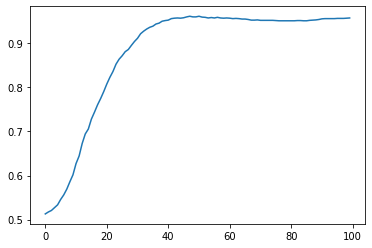

In [334]:
plt.plot(L(learn.recorder.values).itemgot(2))

In [336]:
dls = ImageDataLoaders.from_folder(path)
learn = cnn_learner(dls, resnet18, pretrained=False, loss_func=F.cross_entropy, metrics=accuracy)
learn.fit_one_cycle(1,0.1)

epoch,train_loss,valid_loss,accuracy,time
0,0.083700,0.012712,0.995584,03:31
